## Intro to Statistics in Python pt. 1
Hello, this is my notebook I used to teach myself statistics whilst also learning Python. 

Topics covered in this notebook:
* Identifying/Summarizing Variables
* Measures of Central Tendency
* Dispersion and Spread of Data
* Z-scores
* Correlation and Pearson's R
* Regression

In [48]:
#Libraries used
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import numpy as np
import quandl

### The Data
The data used in this notebook come from the US Census: [US Census PUMS Data 2014](http://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=ACS_pums_csv_2014&prodType=document)

All info on the variables are found here: [Variable Documentation](http://www2.census.gov/programs-surveys/acs/tech_docs/pums/data_dict/PUMSDataDict14.pdf)

In [49]:
#Table metadata + column names
data = pd.read_csv('dc_data/dc.csv')
print data.head()
print data.shape
for i in data.columns:
    print i

  RT  SERIALNO  SPORDER  PUMA  ST   ADJINC  PWGTP  AGEP  CIT CITWP   ...     \
0  P        56        1   105  11  1008425     91    19    1         ...      
1  P       957        1   105  11  1008425     97    55    1         ...      
2  P      1138        1   104  11  1008425     73    88    1         ...      
3  P      1138        2   104  11  1008425     61    93    1         ...      
4  P      1325        1   104  11  1008425    144    49    1         ...      

   pwgtp71  pwgtp72  pwgtp73  pwgtp74  pwgtp75  pwgtp76  pwgtp77  pwgtp78  \
0        1      184      188        1       86      194        1        1   
1       96        1       90       81      109      216       86      214   
2       23       71       72       70       98       98       23       72   
3       23       66       58       67       96       72       17       51   
4      123      248       39      162      135      142      245       45   

   pwgtp79  pwgtp80  
0      100       86  
1      110        

### Statistics - Identifying and Summarizing Variables
It is important to identify the variables in a dataset so the proper graphs/tests are used to summarize/compare the variables.

Categorical variable examples
* ST = State (Nominal)
* ENG = Ability to Speak English 4-pt scale (ordinal)

Quantitative variable examples
* Age (interval)
* PWGTP = Person's Weight (Ratio)

**Summarizing Variables**

To see a quick distribution of a variable, use a **frequency table**. Below, we use gender as an example.

For categorical data, use a **bar chart** to summarize a variable. Below, we use marriage (nominal) as an example.

For quantitative data, use a **histogram** to summarize a variable. Below, we use annual income as an example.

male      3455
female    3062
Name: SEX, dtype: int64
male      0.530152
female    0.469848
Name: SEX, dtype: float64

The max annual wages is 0582000. 

Married                   0.266841
Widowed                   0.043271
Divorced                  0.085469
Separated                 0.017953
Never Married/Under 15    0.586466
Name: MAR, dtype: float64


count      5719.000000
mean      45104.004896
std       70420.100169
min           0.000000
25%           0.000000
50%       20000.000000
75%       67000.000000
max      582000.000000
Name: WAGPconv, dtype: float64

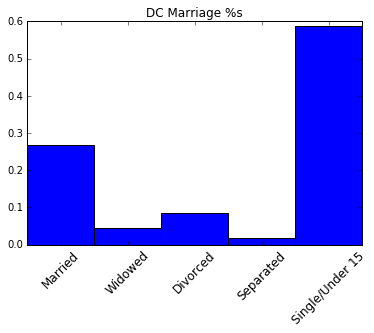

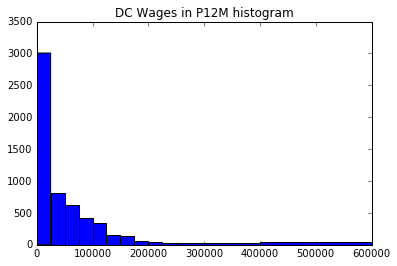

In [55]:
#Frequency Table Gender
gen = data.SEX.value_counts(dropna=True)
gen.index=['male','female']
print gen
genP = data.SEX.value_counts(dropna=True, normalize = True)
genP.index=['male','female']
print genP
print '\nThe max annual wages is {x}. \n'.format(x=data.WAGP.max())

#Freq Table Marriage
fig1 = plt.figure()
ax = fig1.add_subplot(111)
marriage = data.MAR.value_counts(dropna=True, normalize = True)
marriageTbl = marriage.sort_index()
marriageTbl.index=['Married','Widowed','Divorced','Separated','Never Married/Under 15']
print marriageTbl

#Marriage Histogram
plt.bar(marriage.keys(),marriage, width = 1)
ax.set_title('DC Marriage %s')
ax.set_xticks([1.5,2.5,3.5,4.5,5.5])
xticks = ['Married','Widowed','Divorced','Separated','Single/Under 15']
xtnames = ax.set_xticklabels(xticks)
plt.setp(xtnames, rotation=45, fontsize=12)

#Histogram - WAGP
def convIncome(x):
    if x == '0000000':
        return 0
    elif x == ' ':
        return np.NaN
    else: 
        return int(x.lstrip('0'))
data['WAGPconv'] = data['WAGP'].apply(convIncome)
bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,300000,400000,600000]
plt.figure()
plt.hist(data.WAGPconv.dropna(),bins=bins) #skewed right
plt.title("DC Wages in P12M histogram")
data.WAGPconv.describe()

### Measures of Central Tendency
After summarizing the variables through tables and graphs, it is a good idea to look at the central tendency of the distributions of the variables through measures like **mean**, **median**, and **mode**. These measurements can tell us more about the data and are used to compute more complex statistical tests.

**Mode**

Defined as the value that occurs most frequently. Only really used for nominal variables since nominal vars cannot be ordered for a median nor can math calcs can be used on them. One can see easily what the mode is by looking at a bar chart. 

**Median**

Defined as the most middle value after values are arranged from least to greatest. In an even amount of data values, the average of the two most middle values is the median. It is appropriate to use median to describe quantitative variables. Median is more useful to describe central tendency in a distribution if there are outliers in the data.

**Mean**

Defined as the sum of all data divided by the sample size. It is appropriate to use mean to describe quantitative variables. Mean and median should be similar in a bell shaped distribution (normal dist) as one can see in the hrs worked example below, however, as stated before, outliers will greatly affect the mean and median difference as seen in the income example.

The mode for grade level is 15.0. Reponse of 15 means College Undegraduate Years (freshman to senior).
The median hrs worked is 40.0. The mean is 39.55
The median annual wages is 20000.0. The mean is 45104.004896


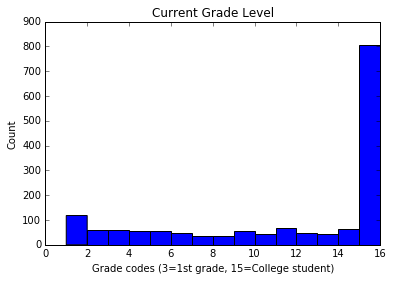

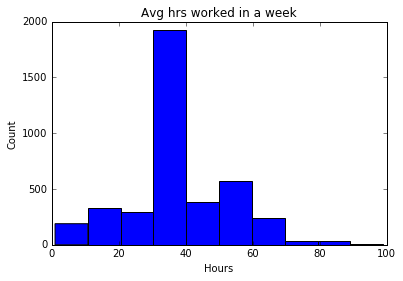

In [106]:
#Mode example
gradelvl = data.SCHG.mode()[0]
print "The mode for grade level is {mode}. Reponse of 15 means College Undegraduate Years (freshman to senior).".format(mode=gradelvl)
plt.figure()
plt.title("Current Grade Level")
plt.xlabel('Grade codes (3=1st grade, 15=College student)')
plt.ylabel('Count')
plt.hist(data.SCHG.dropna(), bins=15)

#Median/Mean Example
hrswk = pd.to_numeric(data.WKHP, errors = 'coerce')
hrswk = hrswk.dropna()
hrmedian = hrswk.median()
hrmean = round(hrswk.mean(),2)
print "The median hrs worked is {m}. The mean is {mo}".format(m = hrmedian, mo=hrmean)
plt.figure()
plt.hist(hrswk)
plt.xlabel('Hours')
plt.ylabel('Count')
plt.title("Avg hrs worked in a week")

incmedian = data.WAGPconv.median()
incmean = data.WAGPconv.mean()
print "The median annual wages is {med}. The mean is {mean}".format(med=incmedian,mean=incmean)

### Dispersion/Spread of Data
In addition, one needs to look at the dispersion or spread of the distribution. A dataset can have the same mean/median as another dataset yet have very different distribution shapes, so dispersion needs to be looked at to gain a better understanding on what the data is saying. Two simple measurements of dispersion are **range** and **Interquartile range**. 

**Range**

The range of a dataset is simply the maximum value subtracted by the minimum value in the dataset. Once again, income is used to find the range in the example below. While range can be useful, it is far too simple and gets tripped up by outliers as shown in the example below. 

**Interquartile Range**
Interquartile Range (IQR) is a more precise way to measure spread in a dataset. How it works is that it divides the distribution of values into quartiles. If the data is sorted from least to greatest, you can think of quartiles as "bins" where the first quartile (Q1) is the first 25% of values in a dataset, the 2nd quartile (Q2) includes all values after the first 25% of values up to 50% of the values, and Q3 and Q4 follow the same pattern (50%-75%, 75%- 100%).

To visualize the IQR, boxplots are used which are seen below. The boxplots of hours worked and annual wages show a lot of outliers meaning these distributions seem to be very spread out. A question I had was who are these people over the age of 15 earning $0? The last 2 graphs answer the question.

It seems that from the histograms of age and employment status, the majority of these people are either students (15-30 yrs old) or seniors (60+). This makes sense and explains why there are so many people who are reporting $0 annual income and are above 16 years old.

#### Variance and Standard Deviation
More measures of variability. Without context, there is not much to it except that it's a very important concept to know for future statistical methods. I won't show any examples here but numpy as functions like .std() to easily find standard deviation of a column.

The max is 99.0. The min is 1.0. The range is then 98.0.

The median is 40.
Q1 is 38.0
Q3 is 45.0
IQR is then 7.0

Numpy method - Q1: 38.0, Q3: 45.0, IQR: 7.0 
40.0

Amount of people who make < $10000 is 2521


(array([  453.,    27.,   220.,     3.,     0.,  1773.]),
 array([ 1.        ,  1.83333333,  2.66666667,  3.5       ,  4.33333333,
         5.16666667,  6.        ]),
 <a list of 6 Patch objects>)

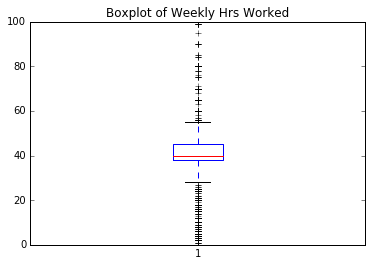

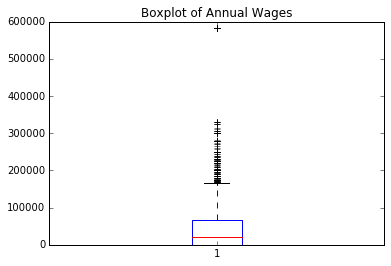

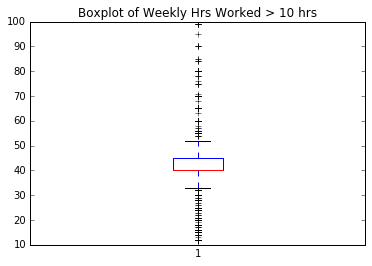

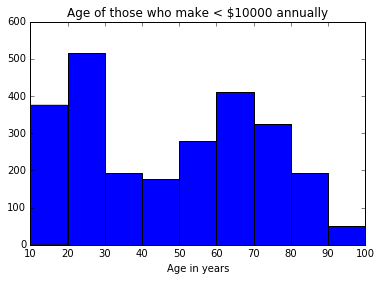

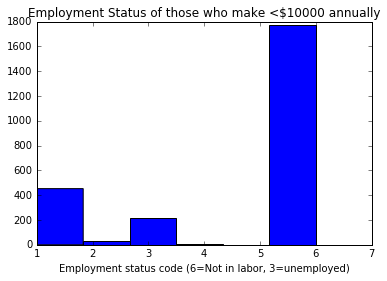

In [107]:
#Calculating Range
print "The max is {max}. The min is {min}. The range is then {rng}.".format(max=hrswk.max(),min=hrswk.min(), \
                                                                           rng=hrswk.max()-hrswk.min())
#Calculating IQR "manually"
Q2 = int(hrswk.median())
print "\nThe median is {a}.".format(a=Q2)
hrsSort = hrswk.sort_values()
Q1mid = len(hrsSort)/2
Q1 = hrsSort[0:Q1mid].median()
print "Q1 is {q1}".format(q1=Q1)
last = len(hrsSort)
Q3 = hrsSort[Q1mid:last].median()
print "Q3 is {q3}".format(q3=Q3)
print "IQR is then {iqr}".format(iqr=Q3-Q1)

#Calculating IQR using np.percentile()
q3, q1 = np.percentile(hrsSort, [75 ,25])
iqr = q3 - q1
print "\nNumpy method - Q1: {q1}, Q3: {q3}, IQR: {iqr} ".format(q1=q1, q3=q3, iqr=iqr)

#boxplot of weekly hrs and annual wages
plt.figure()
plt.title("Boxplot of Weekly Hrs Worked")
plt.boxplot(hrswk)
plt.figure()
plt.title("Boxplot of Annual Wages")
plt.boxplot(data.WAGPconv.dropna())

#Boxplot of those who worked > 10 hrs
FT = hrswk[hrswk > 10]
plt.figure()
print FT.median()
plt.title("Boxplot of Weekly Hrs Worked > 10 hrs")
plt.boxplot(FT.values) #boxplot() looks for 0 index, workaround

#Who are those who are making <$10,000 and throwing the distribution off
print "\nAmount of people who make < $10000 is {a}".format(a=len(data[data.WAGPconv < 10000]))
plt.figure()
plt.title("Age of those who make < $10000 annually")
plt.xlabel('Age in years')
plt.hist(data['AGEP'][data.WAGPconv < 10000].dropna(),bins=[10,20,30,40,50,60,70,80,90,100])
plt.figure()
plt.title("Employment Status of those who make <$10000 annually")
plt.xlabel("Employment status code (6=Not in labor, 3=unemployed)")
plt.hist(data['ESR'][data.WAGPconv < 10000].dropna(),bins=6)

### Z-scores
A Z-score is given to a specific observation in a dataset to measure how common or exceptional the observation is. This is useful. Easy way to define z-scores is "how many standard deviations away from the mean". For bell shaped curves, a good rule is that 68% of all observations lie within z-scores of -1 and 1 and 95% of z-scores lie between -2 and 2 z-scores. An example is shown below on the age distribution.

The formula is (x - mean) / stdev.

Standardization is thus converting the observations into z-scores or # of standard deviations away from the mean.


% of observations within 1 std dev: 66.6410925272%
% of observations within 2 std dev: 97.2379929415%


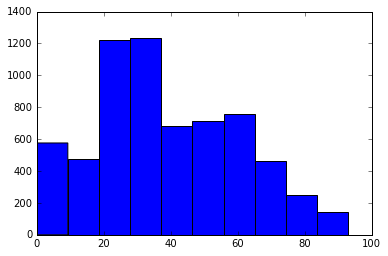

In [52]:
age = data.AGEP.dropna()
plt.figure()
plt.hist(age)
ageZ = age.apply(lambda x: (x-age.mean())/age.std())
z1 = data.AGEP.loc[ageZ[(ageZ >= -1) & (ageZ <=1)].index]
z2 = data.AGEP.loc[ageZ[(ageZ >= -2) & (ageZ <=2)].index]
print "% of observations within 1 std dev: {a}%".format(a=100*(float(z1.count())/len(data.AGEP)))
print "% of observations within 2 std dev: {a}%".format(a=100*(float(z2.count())/len(data.AGEP)))

### Correlation and Pearson's R
Correlation in statistics is a technique used to determine how strongly a pair of variables are related. The metric for this can be determined using different methods, but the most common is Pearson's correlation which is what is used below. The formula can be found [here](http://davidmlane.com/hyperstat/A51911.html). Using Z-scores greatly simplifies the calculation.

To see a general correlation for ordinal/nominal variables, use contingency tables. These show the proportions and counts of a variable in relation to another variable. Below is an example of a contingency table with the rows being gender and the columns being marital status.

In the example below for correlation, the two variables r value = 0.45 which indicates the two variables are not correlated. 

,married,widowed,divorced,separated,never married,rowTotal
male,882,52,231,61,1836,3062
female,857,230,326,56,1986,3455
colTotal,1739,282,557,117,3822,6517


,married,widowed,divorced,separated,never married,rowTotal
male,0.507188,0.184397,0.414722,0.521368,0.480377,0.469848
female,0.492812,0.815603,0.585278,0.478632,0.519623,0.530152
colTotal,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,WageZ,HrsZ,Zsum
0,-0.609258,-0.855743,0.521368
1,-0.640499,NaN,NaN
2,-0.640499,NaN,NaN
3,-0.640499,NaN,NaN
4,0.254132,0.033396,0.008487


The Pearson corr coefficient for hrs worked and annual wages is 0.45.


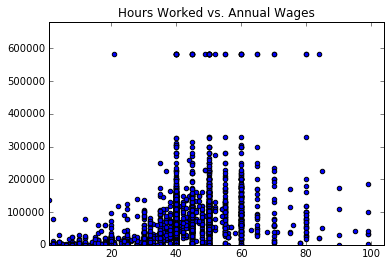

In [110]:
#Freq Tables for Gender vs. Marital Status
marriage = pd.crosstab(index=data['SEX'],
            columns=data['MAR'],
            margins = True)
marriage.index=['male','female', 'colTotal']
marriage.columns=['married','widowed','divorced','separated','never married','rowTotal']
display(marriage)
display(marriage/marriage.ix['colTotal'])

#Scatterplot for WKHP and WAGP
wage = data.WAGPconv
hrswk2 = pd.to_numeric(data.WKHP, errors = 'coerce')
plt.figure()
plt.title('Hours Worked vs. Annual Wages')
plt.xlim(hrswk2.min(),hrswk2.max()+5)
plt.ylim(wage.min(),wage.max()+100000)
plt.scatter(hrswk2,wage)

#Pearson's R - hrs worked and income
wageZ = wage.apply(lambda x: (x-wage.mean())/wage.std())
wageZ.name = 'WageZ'
hrsZ = hrswk.apply(lambda x: (x-hrswk.mean())/hrswk.std())
hrsZ.name = 'HrsZ'
ztbl = pd.concat([wageZ, hrsZ], axis = 1)
ztbl['Zsum'] = ztbl.WageZ*ztbl.HrsZ
display(ztbl.head(5))
sumZ = ztbl.Zsum.sum()
ct = ztbl.Zsum.count()
R = round(sumZ/(ct),2)
print 'The Pearson corr coefficient for hrs worked and annual wages is {R}.'.format(R=R)

### Regression
Work in progress